In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# FEATURE ENGINEERING :
## * **Feature engineering** plays a crucial role in transforming raw data into a format that is more suitable for machine learning models.
## * It helps **handle complex relationships, missing data, and non-normality**, while also **reducing dimensionality** and enhancing interpretability, ultimately making the model more effective in learning from the data.

## NOTE :
### The purpose of this notebook is to **learn different feature engineering techniques available** and not to find the best model for the dataset.

#### Dataset Link - https://www.kaggle.com/datasets/camnugent/california-housing-prices

The feature engineering techniques discussed below are -

### 1. DIMENSIONALITY REDUCTION(PCA)
### 2. SCALING (STANDARDSCALER, NORMALIZER, MINMAX)
### 3. CATEGORICAL ENCODING (DUMMY/ONE-HOT)
### 4. BINNING (GROUPING/AGGREGATING)
### 5. CLUSTERING
### 6. FEATURE SELECTION(COMBINATION)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### It seems 207 rows are missing bedroom count. 
### It would be prudent to drop these rows as they wont provide significant value with missing bedroom count.

In [6]:
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df[df['total_rooms'] == 39320]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND


# SPLITING INTO TRAIN AND TEST DATA

In [9]:
#shuffling the rows
df=df.sample(frac=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1237,-120.37,38.25,13.0,4495.0,856.0,1149.0,459.0,2.5352,113700.0,INLAND
12798,-121.45,38.62,38.0,2419.0,605.0,1696.0,503.0,1.4861,63100.0,INLAND
18408,-121.80,37.27,17.0,3912.0,737.0,2693.0,746.0,5.0772,221500.0,<1H OCEAN
1030,-120.25,38.55,15.0,4403.0,891.0,1103.0,433.0,3.0125,111700.0,INLAND
6038,-117.73,34.07,33.0,1921.0,489.0,1430.0,467.0,2.3406,122600.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
5040,-118.32,33.98,44.0,1448.0,314.0,861.0,310.0,2.2396,108600.0,<1H OCEAN
8712,-118.36,33.86,36.0,681.0,122.0,360.0,128.0,5.2799,332600.0,<1H OCEAN
18668,-121.91,36.99,23.0,5675.0,964.0,2197.0,880.0,4.8693,322300.0,NEAR OCEAN
16136,-122.49,37.79,52.0,3146.0,478.0,1143.0,455.0,6.1407,500001.0,NEAR BAY


In [10]:
# Dividing the data into 80,20 for train and test respectively

train = df[:17000] #first 17000 rows for training
train = train.reset_index(drop=True) # reset the index so that its easier to understand

test = df[17000:]  #from 17000 till the end num of rows for training (would be 3433 values)
test = test.reset_index(drop=True)

In [11]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120.37,38.25,13.0,4495.0,856.0,1149.0,459.0,2.5352,113700.0,INLAND
1,-121.45,38.62,38.0,2419.0,605.0,1696.0,503.0,1.4861,63100.0,INLAND
2,-121.80,37.27,17.0,3912.0,737.0,2693.0,746.0,5.0772,221500.0,<1H OCEAN
3,-120.25,38.55,15.0,4403.0,891.0,1103.0,433.0,3.0125,111700.0,INLAND
4,-117.73,34.07,33.0,1921.0,489.0,1430.0,467.0,2.3406,122600.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16995,-118.43,34.16,34.0,2459.0,489.0,1139.0,463.0,4.0347,353600.0,<1H OCEAN
16996,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
16997,-117.13,32.81,19.0,2157.0,554.0,1349.0,535.0,2.7652,177400.0,NEAR OCEAN
16998,-119.51,34.39,32.0,1921.0,394.0,951.0,334.0,3.2330,346000.0,NEAR OCEAN


In [12]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-124.16,40.79,52.0,1264.0,277.0,591.0,284.0,1.7778,76900.0,NEAR OCEAN
1,-117.36,34.00,19.0,4592.0,895.0,2769.0,838.0,3.3622,105100.0,INLAND
2,-120.35,38.04,16.0,1499.0,326.0,733.0,286.0,2.5729,118800.0,INLAND
3,-120.76,35.52,7.0,9613.0,1666.0,4487.0,1653.0,3.6667,250600.0,<1H OCEAN
4,-118.20,33.81,46.0,1388.0,254.0,742.0,241.0,4.6458,212100.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
3428,-118.32,33.98,44.0,1448.0,314.0,861.0,310.0,2.2396,108600.0,<1H OCEAN
3429,-118.36,33.86,36.0,681.0,122.0,360.0,128.0,5.2799,332600.0,<1H OCEAN
3430,-121.91,36.99,23.0,5675.0,964.0,2197.0,880.0,4.8693,322300.0,NEAR OCEAN
3431,-122.49,37.79,52.0,3146.0,478.0,1143.0,455.0,6.1407,500001.0,NEAR BAY


### The dependent variable(the predictor) is the "median_house_value" so we will set it as y

In [13]:
y_train = train['median_house_value'].to_numpy()
y_test = test['median_house_value'].to_numpy()

In [14]:
y_train , y_test

(array([113700.,  63100., 221500., ..., 177400., 346000., 500001.]),
 array([ 76900., 105100., 118800., ..., 322300., 500001., 365200.]))

In [15]:
y_train.shape, y_test.shape

((17000,), (3433,))

## BASELINE MODEL
What this baseline model essentially does is that it takes the average of all the house values in the train data and compares with the house value in test data.

The avg value will be a certain number and it would be compared with each test data to see how close the predictions are to the actual value

In [16]:
avg_house_value = train['median_house_value'].mean()
print(avg_house_value)

baseline_model_predictions = [avg_house_value] * len(test) #this is the value which will be be compared with all the values in test data

207315.12364705882


In [17]:
# checking the error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(baseline_model_predictions , test['median_house_value'] )

91317.03094871576

**This states that on average the base line model is off my 91K USD from the actual value. So in all sense its not a right model.**

## 1. DIMENSIONALITY REDUCTION (PCA)

In [18]:
# Find the correlation between imp features such as households, rooms and bedrooms

train[['households','total_rooms','total_bedrooms']].corr()

,households,total_rooms,total_bedrooms
households,1.000000,0.919161,0.980729
total_rooms,0.919161,1.000000,0.929533
total_bedrooms,0.980729,0.929533,1.000000


Correlation values are always between -1 to 1. If the values are positive, like above, it means the variables have positive correlation among them. As the number of total_rooms increases, total_bedrooms increases as well. It will be linear upward graph.

Now, why did we do this? As we can see there's so much positive correlation betwn these variables, these all are going to have almost the same effect on the median_house_value. Yes, you can just use one of the variables among these but a more suggested method to use is PCA.

In [19]:
# Before we begin, we'll use only these 3 variables in a df without PCA

x_train_3 = train[['households','total_rooms','total_bedrooms']].to_numpy()
x_train_3

array([[ 459., 4495.,  856.],
       [ 503., 2419.,  605.],
       [ 746., 3912.,  737.],
       ...,
       [ 535., 2157.,  554.],
       [ 334., 1921.,  394.],
       [ 189., 1327.,  190.]])

In [20]:
x_train_3.shape

(17000, 3)

In [21]:
# similarly with the test data
x_test_3 = test[['households','total_rooms','total_bedrooms']].to_numpy()
x_test_3.shape

(3433, 3)

In [22]:
# getting error on random forest with training on (x_train_3, y_train) and testing on (x_test_3, y_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 40, max_depth = 5).fit(x_train_3, y_train)
rf_predictions = rf.predict(x_test_3)

mean_absolute_error(y_test, rf_predictions )

81986.03287564534

On avg the model was off by 81k USD from actual values

In [23]:
# now let's if PCA - linear dimensionality reduction technique with 2 feature output helps for this particular df 
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2 here means that output 2 columns with the neccessary values.
pca = pca.fit(x_train_3) # in our case we feed 3 columns, but through pca we get 2 columns with concise values of all 3 columns
                         # through this we wont further need 3 columns, we'd need only 2

pca

PCA(n_components=2)

In [24]:
x_train_pca = pca.transform(x_train_3)
x_test_pca = pca.transform(x_test_3)

In [25]:
x_train_pca

array([[ 1860.26046989,  -243.94589907],
       [ -194.18524519,   100.51463046],
       [ 1318.16332961,     5.01126614],
       ...,
       [ -452.67894231,   148.43578611],
       [ -741.81000914,   -43.55172458],
       [-1377.70665169,  -143.84503669]])

In [26]:
x_test_pca

array([[-1408.66956331,    -4.01506108],
       [ 2021.19536026,    17.06981121],
       [-1171.39641008,   -23.93302372],
       ...,
       [ 3092.34103365,  -161.79414325],
       [  482.42807596,  -191.93947101],
       [-1230.17159663,  -108.32616905]])

In [27]:
# testing the new pca data with earlier random forest regessor
from sklearn.ensemble import RandomForestRegressor
rf_pca = RandomForestRegressor(n_estimators = 40, max_depth = 5).fit(x_train_pca, y_train)
rf_pca_predictions = rf_pca.predict(x_test_pca)

mean_absolute_error(y_test, rf_pca_predictions )

80171.23543719461

So, the PCA did help. Maybe if we change it to linear regg or some other fine tuning in columns, can give better results as well.

## 2. PREPROCESSING / SCALING

### Usually when values are far apart from each other(some values are in 10000s whereas some are in 100s), this creates problems for model esp deep learning models. So, to avoid this we use scaling to make the values in somewhat closer range with eachother.

In [28]:
x_train_3

array([[ 459., 4495.,  856.],
       [ 503., 2419.,  605.],
       [ 746., 3912.,  737.],
       ...,
       [ 535., 2157.,  554.],
       [ 334., 1921.,  394.],
       [ 189., 1327.,  190.]])

 So here is you see, the ones with large values will be considered of higher importance by the model. but that shouldnt be the case because we know all 3 are pretty much of same importance and have positive correlation among eachother. so when we scale all the values are brought down to similar ranges, which tells the model that all the columns are more or less of same importance.

In [29]:
# different preprocessing approaches on x_train_3

# 1. Standard Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

scaler = StandardScaler().fit(x_train_3)
x_train_3_scaled = scaler.transform(x_train_3)


In [30]:
x_train_3_scaled 

array([[-0.10354708,  0.85030177,  0.75626789],
       [ 0.01108939, -0.09711996,  0.16137372],
       [ 0.64419539,  0.58423873,  0.47422643],
       ...,
       [ 0.09446138, -0.2166886 ,  0.04049881],
       [-0.42921889, -0.32439165, -0.3387166 ],
       [-0.80699819, -0.59547474, -0.82221624]])

Underlying concept of scaler - it takes each value and subtracts with the mean of the whole column and divides by standard deviation. this is done for each value in the column.
So, in the above example the values now also have negative values and are majorly in between -3 to 3(checked through plotting) 

(array([1.2838e+04, 3.4180e+03, 5.3200e+02, 1.2200e+02, 5.0000e+01,
        1.7000e+01, 1.3000e+01, 5.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([-1.29680859,  0.28751962,  1.87184784,  3.45617605,  5.04050426,
         6.62483248,  8.20916069,  9.7934889 , 11.37781712, 12.96214533,
        14.54647354]),
 <BarContainer object of 10 artists>)

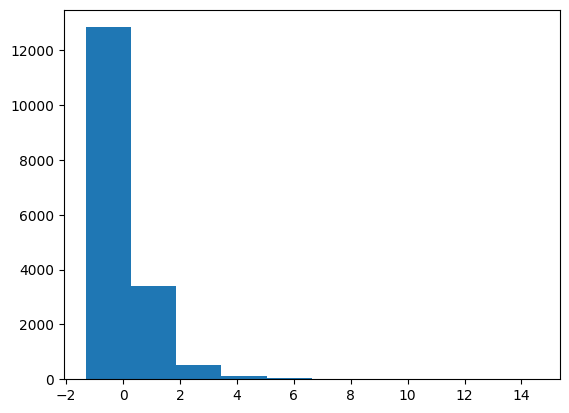

In [31]:
import matplotlib.pyplot as plt

plt.hist(x_train_3_scaled[:,0]) # just the first column

(array([9.400e+01, 7.660e+02, 8.491e+03, 6.129e+03, 1.193e+03, 2.490e+02,
        5.800e+01, 1.300e+01, 5.000e+00, 2.000e+00]),
 array([0.00693435, 0.06768906, 0.12844377, 0.18919848, 0.24995319,
        0.31070789, 0.3714626 , 0.43221731, 0.49297202, 0.55372673,
        0.61448144]),
 <BarContainer object of 10 artists>)

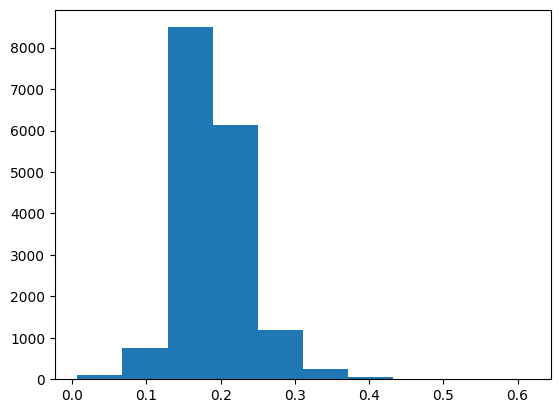

In [32]:
# 2. Normalisation 

normalise = Normalizer().fit(x_train_3)
x_train_3_normalised = normalise.transform(x_train_3)

plt.hist(x_train_3_normalised[:,0])

(array([1.2838e+04, 3.4180e+03, 5.3200e+02, 1.2200e+02, 5.0000e+01,
        1.7000e+01, 1.3000e+01, 5.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

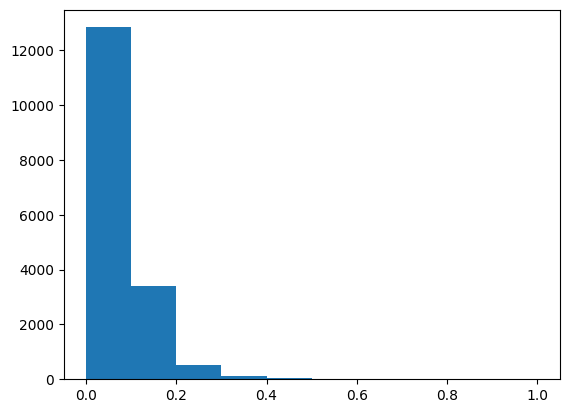

In [33]:
# 3. MinMaxScaler

minmax = MinMaxScaler().fit(x_train_3)
x_train_3_minmax = minmax.transform(x_train_3)

plt.hist(x_train_3_minmax[:,0])

So it completely depends on your problem statement which you'd prefer over other. Try all of them out and see what works the best. Mostly you will have to standardize your data. When you know that there's a max value out there, suppose image data, which would have values between 0 and 255, you'd want to use MinMax scaler
You'd think why? since the all values are in similar range, why to standarise them? this is because most of the ml algorithms, neural networks tend to perform quite good when the values are betwn 0 - 1, -3 or 3, just something small like that.

In [34]:
x_train_3_scaled 

array([[-0.10354708,  0.85030177,  0.75626789],
       [ 0.01108939, -0.09711996,  0.16137372],
       [ 0.64419539,  0.58423873,  0.47422643],
       ...,
       [ 0.09446138, -0.2166886 ,  0.04049881],
       [-0.42921889, -0.32439165, -0.3387166 ],
       [-0.80699819, -0.59547474, -0.82221624]])

In [35]:
x_test_3_scaled = scaler.transform(x_test_3)


In [36]:
x_test_3_scaled 

array([[-0.55948762, -0.62422598, -0.61601786],
       [ 0.88388984,  0.89456955,  0.84870165],
       [-0.55427687, -0.5169793 , -0.49988315],
       ...,
       [ 0.99331557,  1.38881701,  1.0122383 ],
       [-0.11396858,  0.23466019, -0.13962851],
       [-0.68194021, -0.53386495, -0.70371143]])

In [37]:
# testing the new scaled data with earlier random forest regessor

rf_scaled  = RandomForestRegressor(n_estimators = 40, max_depth = 5).fit(x_train_3_scaled , y_train)
rf_scaled_predictions = rf_scaled.predict(x_test_3_scaled)

mean_absolute_error(y_test, rf_scaled_predictions )

81707.48856036112

Predicted values are 81k off from the actual values. Honestly, this shows that RF isnt really interested with scaling But, remember Neural Networks prioritise it a lot.

In [38]:
### Turns out the PCA prefers having the data first be normalized and then fed for dimensionality reduction. So, we create a pipeline which would
### Pipeline -- Normalization -> PCA -> RF

In [39]:
from sklearn.pipeline import Pipeline

normalize_pca_rf = Pipeline(steps=[('Normalizer', Normalizer()),('PCA',PCA(n_components = 2)),('RF',RandomForestRegressor(n_estimators = 40, max_depth = 5))])
normalize_pca_rf

Pipeline(steps=[('Normalizer', Normalizer()), ('PCA', PCA(n_components=2)),
                ('RF', RandomForestRegressor(max_depth=5, n_estimators=40))])

In [40]:
normalize_pca_rf.fit(x_train_3 , y_train)
normalize_pca_rf_predictions = normalize_pca_rf.predict(x_test_3)

In [41]:
mean_absolute_error(y_test, normalize_pca_rf_predictions )

78230.4281775273

The values are a bit better this time (drop from 82k to 78k). Similarly you can try and test different approaches and see which performs the best.

# 3. CATEGORICAL ENCODING (ONE HOT/ DUMMY)

#### dummy - pandas version 
#### one hot - numpy version
#### both perform the same thing
#### dummy encoding is done when there are categorical values, and each such value has to be given a numerical value.
#### but this isnt used in all cases for ex. Words. Words are encoded using Embeddings instead of dummy because what dummy does is it considers all the categories as seperate entities but suppose you are analysing a sentence, there are words that are similar to each other, you cant do dummy because that would just ignore the similarity among the words itself

In [42]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120.37,38.25,13.0,4495.0,856.0,1149.0,459.0,2.5352,113700.0,INLAND
1,-121.45,38.62,38.0,2419.0,605.0,1696.0,503.0,1.4861,63100.0,INLAND
2,-121.80,37.27,17.0,3912.0,737.0,2693.0,746.0,5.0772,221500.0,<1H OCEAN
3,-120.25,38.55,15.0,4403.0,891.0,1103.0,433.0,3.0125,111700.0,INLAND
4,-117.73,34.07,33.0,1921.0,489.0,1430.0,467.0,2.3406,122600.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16995,-118.43,34.16,34.0,2459.0,489.0,1139.0,463.0,4.0347,353600.0,<1H OCEAN
16996,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
16997,-117.13,32.81,19.0,2157.0,554.0,1349.0,535.0,2.7652,177400.0,NEAR OCEAN
16998,-119.51,34.39,32.0,1921.0,394.0,951.0,334.0,3.2330,346000.0,NEAR OCEAN


In [43]:
# in this dataset though, it makes sense to use dummy encoding for 'ocean_proximity' 
# because all the categories are different from each other

train_dummies = pd.get_dummies(train['ocean_proximity']).astype(int)
train_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,1,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [44]:
# concatenate the dummy variables to the training data

train = pd.concat([train, train_dummies] , axis = 1)
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-120.37,38.25,13.0,4495.0,856.0,1149.0,459.0,2.5352,113700.0,INLAND,0,1,0,0,0
1,-121.45,38.62,38.0,2419.0,605.0,1696.0,503.0,1.4861,63100.0,INLAND,0,1,0,0,0
2,-121.80,37.27,17.0,3912.0,737.0,2693.0,746.0,5.0772,221500.0,<1H OCEAN,1,0,0,0,0
3,-120.25,38.55,15.0,4403.0,891.0,1103.0,433.0,3.0125,111700.0,INLAND,0,1,0,0,0
4,-117.73,34.07,33.0,1921.0,489.0,1430.0,467.0,2.3406,122600.0,INLAND,0,1,0,0,0


In [45]:
train['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7561
INLAND        5349
NEAR OCEAN    2191
NEAR BAY      1896
ISLAND           3
Name: count, dtype: int64

notice island just has 3 values, but since it is a category, there would be a extra column just for it. 

In [46]:
train.drop(['ocean_proximity','ISLAND'], inplace = True , axis = 1)

In [47]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-120.37,38.25,13.0,4495.0,856.0,1149.0,459.0,2.5352,113700.0,0,1,0,0
1,-121.45,38.62,38.0,2419.0,605.0,1696.0,503.0,1.4861,63100.0,0,1,0,0
2,-121.80,37.27,17.0,3912.0,737.0,2693.0,746.0,5.0772,221500.0,1,0,0,0
3,-120.25,38.55,15.0,4403.0,891.0,1103.0,433.0,3.0125,111700.0,0,1,0,0
4,-117.73,34.07,33.0,1921.0,489.0,1430.0,467.0,2.3406,122600.0,0,1,0,0


In [48]:
# similarly for the test data

test_dummies = pd.get_dummies(test['ocean_proximity']).astype(int)
test_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,0,1
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [49]:
test = pd.concat([test, test_dummies] , axis = 1)
test.drop(['ocean_proximity'], inplace = True , axis = 1)
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-124.16,40.79,52.0,1264.0,277.0,591.0,284.0,1.7778,76900.0,0,0,0,0,1
1,-117.36,34.00,19.0,4592.0,895.0,2769.0,838.0,3.3622,105100.0,0,1,0,0,0
2,-120.35,38.04,16.0,1499.0,326.0,733.0,286.0,2.5729,118800.0,0,1,0,0,0
3,-120.76,35.52,7.0,9613.0,1666.0,4487.0,1653.0,3.6667,250600.0,1,0,0,0,0
4,-118.20,33.81,46.0,1388.0,254.0,742.0,241.0,4.6458,212100.0,0,0,0,0,1


In [50]:
test.drop(['ISLAND'], inplace = True , axis = 1)

### Just for curiosity I will be training a model just on these dummy variables. Ofcourse later on we will utilize the whole dataset.

In [51]:
x_train_dummies = train.to_numpy()[:,-4:] # just the last 4 columns
x_train_dummies

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [52]:
x_test_dummies = test.to_numpy()[:,-4:] # just the last 4 columns
x_test_dummies

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [53]:
# using linear regression this time

from sklearn.linear_model import LinearRegression
lr_dummy = LinearRegression().fit(x_train_dummies, y_train)
lr_dummy_predictions = lr_dummy.predict(x_test_dummies)

mean_absolute_error(y_test, lr_dummy_predictions )

75691.38107776093

just by using the dummy variables, the model is able to perform good.

# 4. BINNING (GROUPING, AGGREGATING)

In [54]:
# So sometimes instead of scaling or pca, what we can do for some columns esp age data for instance is is to create bins or groups
# as we can see below, the "housing_median_age" can be binned for some values

<Axes: >

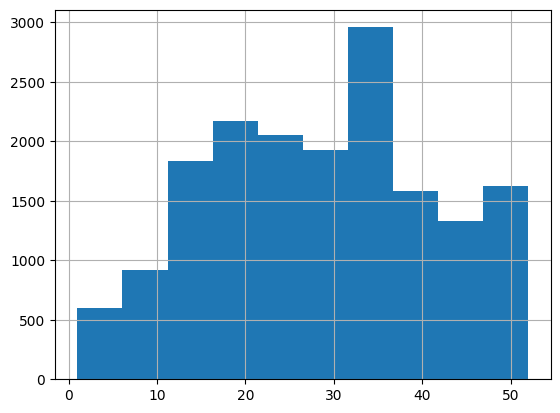

In [55]:
train['housing_median_age'].hist()

In [56]:
train['house_age_less_than_30'] = (train['housing_median_age'] < 30).astype(int) # 30 is just an example. you can bin differently as well

# there are other ways as well like mutliple variable say age less than 20 then 0, age betwn  20 to 40 -> 1, age above 40 -> 2. this can be done through one hot encoding

In [57]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,house_age_less_than_30
0,-120.37,38.25,13.0,4495.0,856.0,1149.0,459.0,2.5352,113700.0,0,1,0,0,1
1,-121.45,38.62,38.0,2419.0,605.0,1696.0,503.0,1.4861,63100.0,0,1,0,0,0
2,-121.80,37.27,17.0,3912.0,737.0,2693.0,746.0,5.0772,221500.0,1,0,0,0,1
3,-120.25,38.55,15.0,4403.0,891.0,1103.0,433.0,3.0125,111700.0,0,1,0,0,1
4,-117.73,34.07,33.0,1921.0,489.0,1430.0,467.0,2.3406,122600.0,0,1,0,0,0


In [58]:
# new training dataset with just the age values

x_train_median_age30 = train['house_age_less_than_30'].to_numpy().reshape(-1,1)
x_train_median_age30.shape

(17000, 1)

In [59]:
# new test dataset with just the age values

test['house_age_less_than_30'] = (test['housing_median_age'] < 30).astype(int)
x_test_median_age30 = test['house_age_less_than_30'].to_numpy().reshape(-1,1)
x_test_median_age30.shape

(3433, 1)

In [60]:
# training a linear model on age value

lr_median_age30 = LinearRegression().fit(x_train_median_age30, y_train)
lr_median_age30_predictions = lr_median_age30.predict(x_test_median_age30)

mean_absolute_error(y_test, lr_median_age30_predictions )

91260.95099187501

So we can say that the age bining wasnt really of any great help or maybe we can try other combinations of bining the ages.

# 5. CLUSTERING

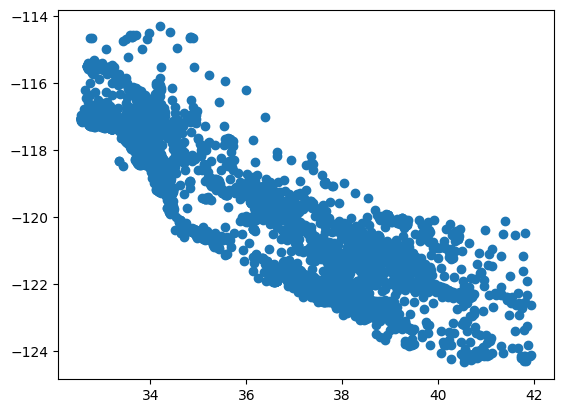

In [61]:
# Plot the scatter plot for lan and lat given in data set - which is of california

plt.scatter(train['latitude'], train['longitude'])

In [62]:
x_train_lat_long = train[['latitude','longitude']].to_numpy()

In [63]:
# K Means model from the longitide and latitude and get clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5).fit(x_train_lat_long)
kmeans.labels_  #array showing which value belongs to which cluster

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 4, 1], dtype=int32)

In [64]:
#plotting the clusters

import plotly.express as px

px.scatter(x=train['latitude'], y=train['longitude'], color = kmeans.labels_)

In [65]:
# now will apply one hot encoding for the said clusters

x_train_dummy_clusters = pd.get_dummies(pd.Series(kmeans.labels_)).to_numpy().astype(int)
x_train_dummy_clusters.shape

(17000, 5)

In [66]:
# similarly for test data, predict the clusters for x test and then one hot encoding

x_test_lat_long = test[['latitude','longitude']].to_numpy()
x_test_dummy_clusters = pd.get_dummies(pd.Series(kmeans.predict(x_test_lat_long))).to_numpy().astype(int)
x_test_dummy_clusters.shape

(3433, 5)

In [67]:
# check error on the linear model only on the cluster one hot encodings

lr_clustering = LinearRegression().fit(x_train_dummy_clusters , y_train)
lr_clustering_predictions = lr_clustering.predict(x_test_dummy_clusters)

mean_absolute_error(lr_clustering_predictions, y_test)

82320.22953684824

# 6. COMBINATION OF FEATURE (FEATURE SELECTIONS)

In [68]:
# lets first take the shapes of all the training data we did feature engg on

x_train_3_scaled.shape, x_train_pca.shape, x_train_dummy_clusters.shape , x_train_dummies.shape 

((17000, 3), (17000, 2), (17000, 5), (17000, 4))

In [69]:
# lets concatenate all the individual training datas into one big x_train_all

x_train_all = np.concatenate([x_train_3_scaled, x_train_dummy_clusters , x_train_dummies], axis = 1)
x_train_all.shape

(17000, 12)

In [70]:
# lets first take the shapes of all the test data we did feature engg on

x_test_3_scaled.shape, x_test_pca.shape, x_test_dummy_clusters.shape , x_test_dummies.shape 

((3433, 3), (3433, 2), (3433, 5), (3433, 4))

In [71]:
# lets concatenate all the individual test datas into one big x_train_all

x_test_all = np.concatenate([x_test_3_scaled, x_test_dummy_clusters , x_test_dummies], axis = 1)
x_test_all.shape

(3433, 12)

In [72]:
# testing the new data with earlier random forest regessor

rf_all = RandomForestRegressor(n_estimators = 40, max_depth = 5).fit(x_train_all, y_train)
rf_all_predictions = rf_all.predict(x_test_all)

mean_absolute_error(y_test, rf_all_predictions )

67364.64158273162

There's a significant drop here. So, this feature engineering did some benefit for the model as the avg error went from 90k to 67k.